In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

In [36]:
data=datasets.load_digits()
x=data.images
y=data.target


In [37]:
x=x.reshape((x.shape[0],8,8,1))
x=x.astype('float32')/255
y=to_categorical(y)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True,monitor='val_loss',mode='min')

In [42]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),
                  callbacks=[earlystop,best_weights])

Epoch 1/50
45/45 [==============================] - 1s 7ms/step - loss: 2.2909 - accuracy: 0.2317 - val_loss: 2.2735 - val_accuracy: 0.4222
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 2.2439 - accuracy: 0.3215 - val_loss: 2.1999 - val_accuracy: 0.5139
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 2.1166 - accuracy: 0.6632 - val_loss: 2.0113 - val_accuracy: 0.7194
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 1.8495 - accuracy: 0.7070 - val_loss: 1.6735 - val_accuracy: 0.6972
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 1.4853 - accuracy: 0.7509 - val_loss: 1.3082 - val_accuracy: 0.7944
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 1.1329 - accuracy: 0.8274 - val_loss: 0.9981 - val_accuracy: 0.8389
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.8721 - accuracy: 0.8420 - val_loss: 0.7901 - val_accuracy: 0.8528
Epoch 8/50
45/45 [==

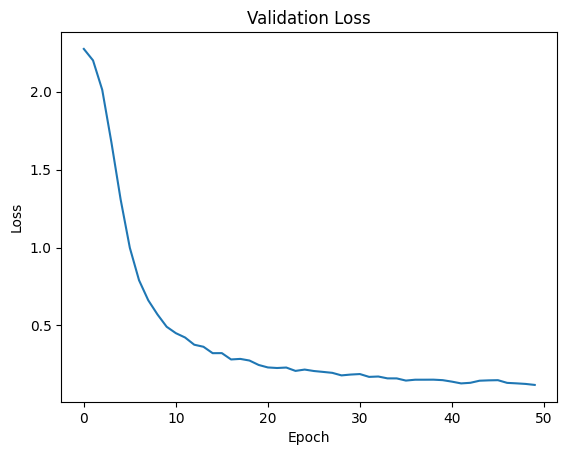

In [43]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

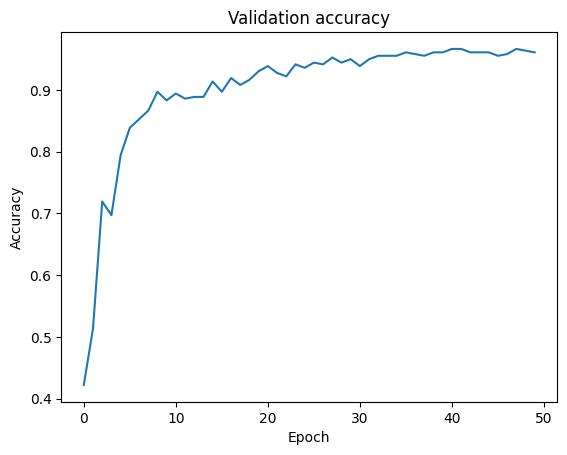

In [44]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [45]:
model.load_weights("best_weights.h5")

In [46]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

Test Loss: 0.11881058663129807
Test Accuracy: 0.9611111283302307
